In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# 6.1 Two dimensional Brownian motion

## Non-correlation version

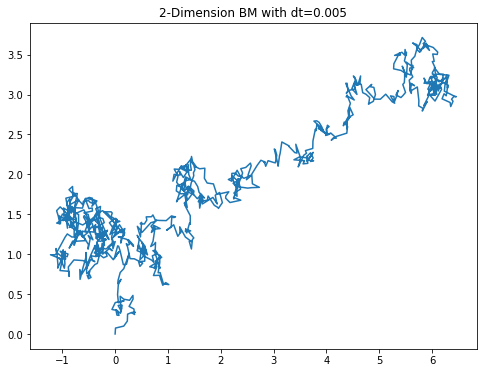

In [2]:
def gen_bm(T, dt):
    m = int(T / dt) + 1
    randomness = np.random.normal(0, np.sqrt(dt), m - 1)
    bm = np.concatenate([[0], randomness.cumsum()])
    return bm

np.random.seed(88)
bm1 = gen_bm(5, 0.005)
bm2 = gen_bm(5, 0.005)
plt.figure(figsize=(8,6))
plt.plot(bm1, bm2)
plt.title("2-Dimension BM with dt=0.005")
plt.show()

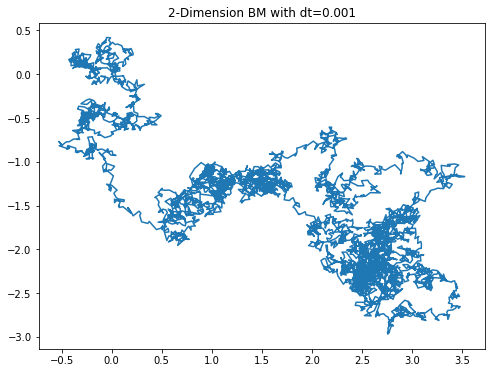

In [3]:
np.random.seed(42)
bm1 = gen_bm(5, 0.001)
bm2 = gen_bm(5, 0.001)
plt.figure(figsize=(8,6))
plt.plot(bm1, bm2)
plt.title("2-Dimension BM with dt=0.001")
plt.show()

## Correlated version

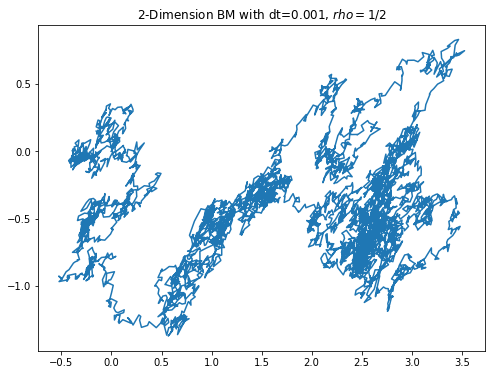

In [4]:
# use X2 = rho Z1 + sqrt(1-rho**2) * Z2 to generate the correlated version
np.random.seed(42)

rho = 0.5

bm1 = gen_bm(5, 0.001)
bm2 = gen_bm(5, 0.001)

x1 = bm1
x2 = rho * bm1 + np.sqrt(1 - rho**2) * bm2
plt.figure(figsize=(8,6))
plt.plot(x1, x2)
plt.title("2-Dimension BM with dt=0.001, $rho=1/2$")
plt.show()

# 6.2 Brownian martingales

##  Sample processes

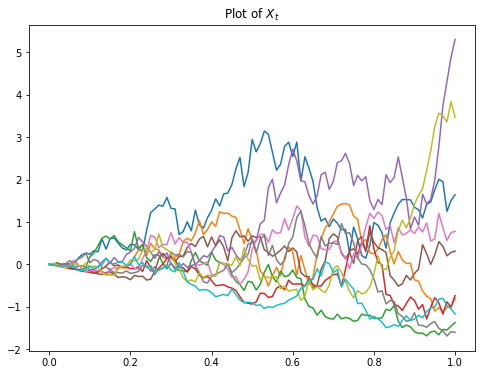

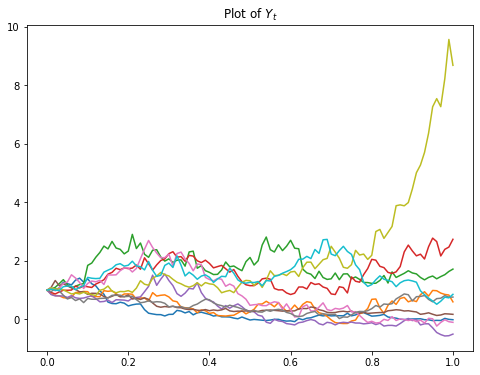

In [7]:
# X_t
time_points = [0.01 * i for i in range(101)]
np.random.seed(42)
BM1 = [gen_bm(1, 0.01) for _ in range(10)]
BM2 = [gen_bm(1, 0.01) for _ in range(10)]

plt.figure(figsize=(8, 6))
for i in range(10):
    Xt = BM1[i]**2 + BM2[i]**2 - 2*np.array(
        [0.01 * i for i in range(len(BM1[0]))])
    plt.plot(time_points, Xt)
plt.title("Plot of $X_t$")
plt.show()

plt.figure(figsize=(8, 6))
for i in range(10):
    Yt = np.exp(BM1[i]) * np.cos(BM2[i])
    plt.plot(time_points, Yt)
plt.title("Plot of $Y_t$")
plt.show()

## The integral version and comparison

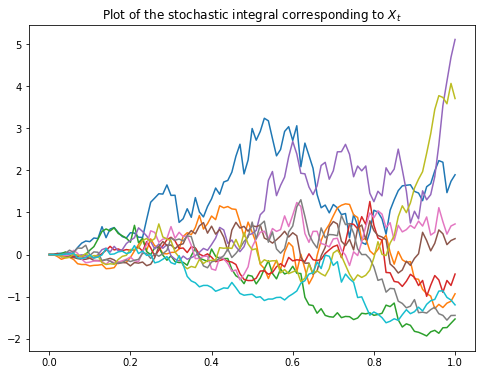

In [8]:
T = 1
dt = 0.01
m = int(T / dt) + 1

# the first process
# sum of two bm integrals
plt.figure(figsize=(8, 6))
for j in range(10):
    bm1 = BM1[j]
    integral_1 = [0 for _ in range(m)]
    for i in range(m - 1):
        integral_1[i + 1] = 2 * bm1[i] * (bm1[i + 1] - bm1[i])
    integral_1 = np.cumsum(integral_1)

    bm2 = BM2[j]
    integral_2 = [0 for _ in range(m)]
    for i in range(m - 1):
        integral_2[i + 1] = 2 * bm2[i] * (bm2[i + 1] - bm2[i])
    integral_2 = np.cumsum(integral_2)

    plt.plot(time_points, integral_1 + integral_2)
plt.title("Plot of the stochastic integral corresponding to $X_t$")
plt.show()

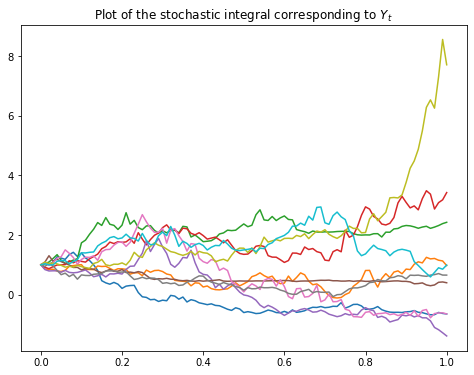

In [7]:
T = 1
dt = 0.01
m = int(T / dt) + 1

plt.figure(figsize=(8, 6))
for j in range(10):
    bm1 = BM1[j]
    integral_1 = [0 for _ in range(m)]
    for i in range(m - 1):
        integral_1[i +
                   1] = np.exp(bm1[i]) * np.cos(bm2[i]) * (bm1[i + 1] - bm1[i])
    integral_1 = np.cumsum(integral_1)

    bm2 = BM2[j]
    integral_2 = [0 for _ in range(m)]
    for i in range(m - 1):
        integral_2[i +
                   1] = np.exp(bm1[i]) * np.sin(bm2[i]) * (bm2[i + 1] - bm2[i])
    integral_2 = np.cumsum(integral_2)

    plt.plot(time_points, integral_1 - integral_2 + 1)
plt.title("Plot of the stochastic integral corresponding to $Y_t$")
plt.show()

## Comments:

We can indeed see that the sample paths generated from those different methods resemble.

# 6.3 Dirichlet Problem

## 6.3 a)

In [8]:
# generate the exit points
dt = 0.01
exit_points = []
for _ in range(1000):
    x = 0.0
    y = 0.5
    while x**2+y**2<1:
        x += np.random.normal(0, np.sqrt(dt))
        y += np.random.normal(0, np.sqrt(dt))
    exit_points.append((x,y))

In [9]:
sim_res = 0.0
for p in exit_points:
    if p[-1]>=0:
        sim_res += 1
    else:
        sim_res -= 1
sim_res /= 1000.0

## 6.3 b)

In [10]:
def approx_h(x_0, y_0):
    dt = 0.01
    sim_res = 0.0
    for _ in range(100):
        x = x_0
        y = y_0
        while x**2 + y**2 < 1:
            x += np.random.normal(0, np.sqrt(dt))
            y += np.random.normal(0, np.sqrt(dt))
        if y >= 0:
            sim_res += 1
        else:
            sim_res -= 1
    return sim_res / 100.0

In [11]:
# it takes around 15 min to finish generating all the points!
grid = [(x*0.01, y*0.01) for x in range(-100,101) for y in range(-100,101)]
df = pd.DataFrame({"x":[x[0] for x in grid], "y":[x[-1] for x in grid]})
df['h'] = df.apply(lambda x: approx_h(x.x, x.y), axis=1)

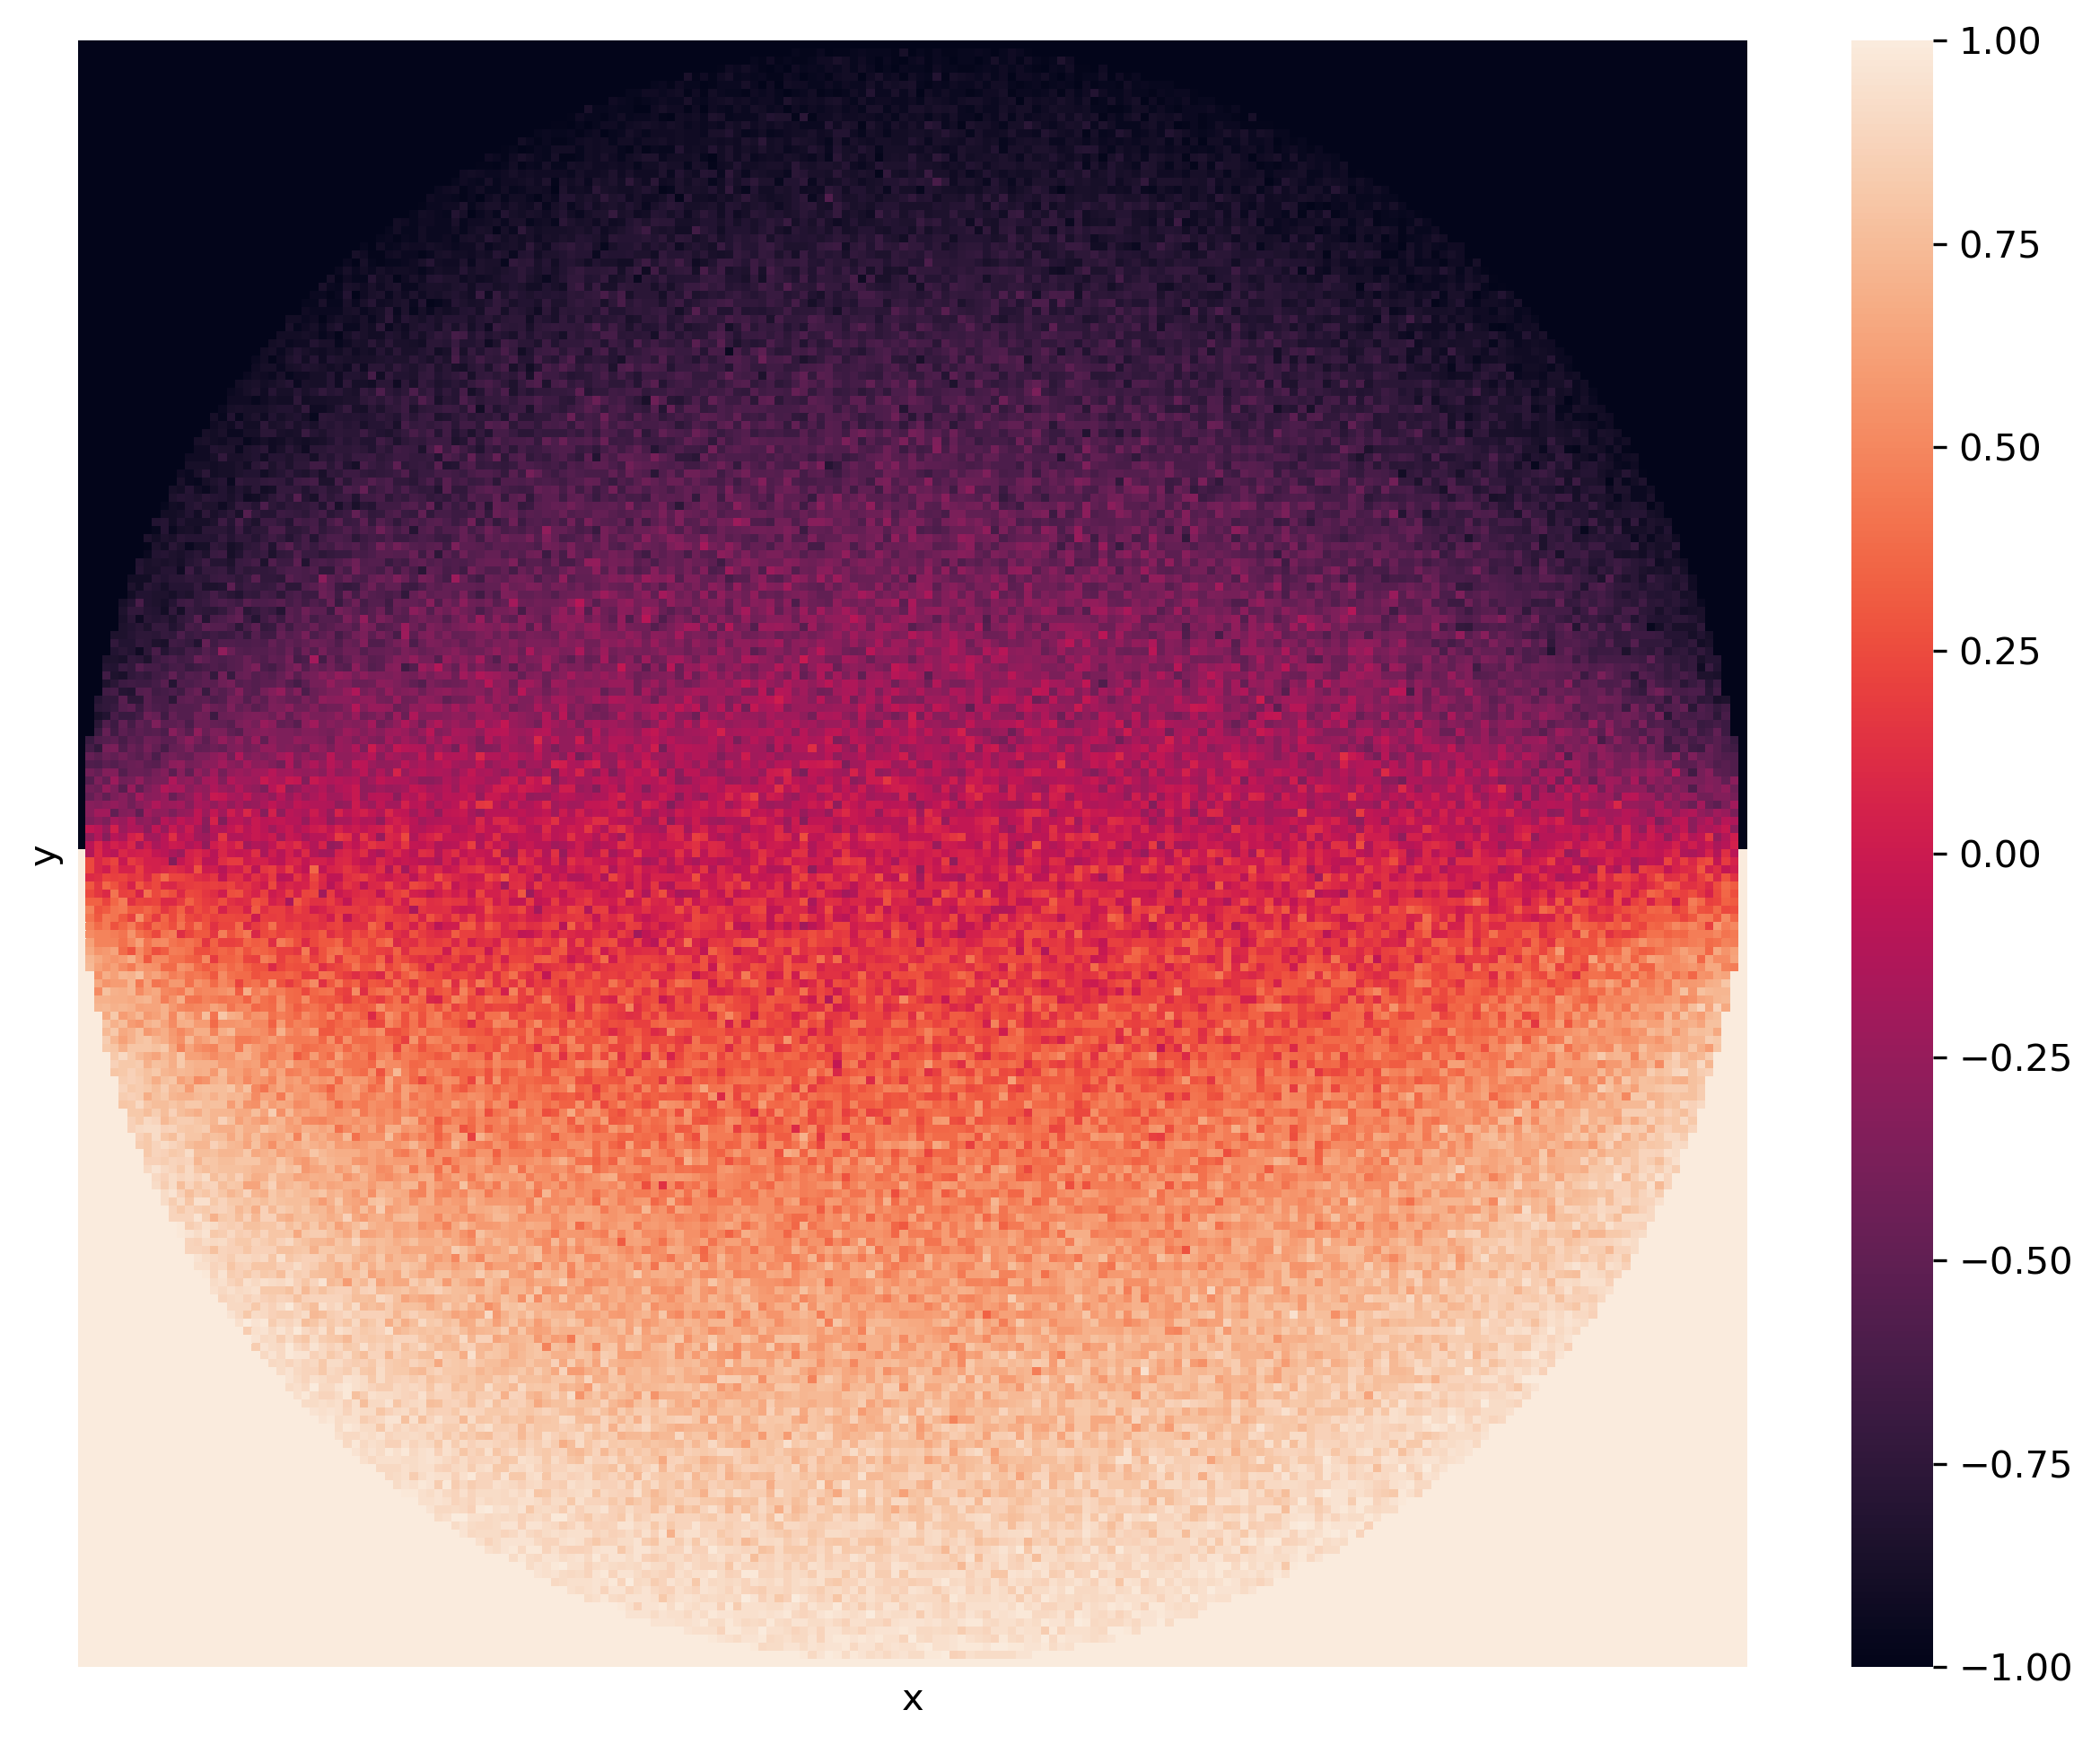

In [12]:
# check the result directly here :-)
plt.figure(figsize=(10,8),dpi=300)
sns.heatmap(df.pivot("y", "x", "h"), xticklabels=False, yticklabels=False)
plt.show()